In [40]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

In [41]:
#definitions

DIMENSIONS=2
SENSORS= 4

COORDINATE_SYSTEM = 1

INPUT_NODES = SENSORS
HIDDEN_NODES = [64,64]
OUTPUT_NODES = DIMENSIONS

In [42]:
#Generate train data

distances, datapoints, sensors = tdg.generateStatic4PointIO(100,2,COORDINATE_SYSTEM)

In [43]:
#Generate Model

inp = keras.layers.Input((SENSORS,))

x = keras.layers.Dense(500, activation='relu')(inp)
x = keras.layers.Dense(500, activation='relu')(x)
xOut = keras.layers.Dense(1, activation='relu', name='xOut')(x)
yOut = keras.layers.Dense(1, activation='relu', name='yOut')(x)
model = keras.models.Model(inputs=inp, outputs=[xOut, yOut])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/25
100/100 [==============================] - 0s 5ms/step - loss: 0.5067 - xOut_loss: 0.1526 - yOut_loss: 0.3541 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 2/25
100/100 [==============================] - 0s 219us/step - loss: 0.4103 - xOut_loss: 0.1605 - yOut_loss: 0.2498 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 3/25
100/100 [==============================] - 0s 190us/step - loss: 0.0844 - xOut_loss: 0.0277 - yOut_loss: 0.0567 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 4/25
100/100 [==============================] - 0s 179us/step - loss: 0.1222 - xOut_loss: 0.0602 - yOut_loss: 0.0620 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 5/25
100/100 [==============================] - 0s 179us/step - loss: 0.0341 - xOut_loss: 0.0215 - yOut_loss: 0.0126 - xOut_acc: 0.0000e+00 - yOut_acc: 0.0000e+00
Epoch 6/25
100/100 [==============================] - 0s 176us/step - loss: 0.0195 - xOut_loss: 0.0127 - yOut_loss: 0.0068 - xOut_acc: 0.0000e+00 - yOut_acc:

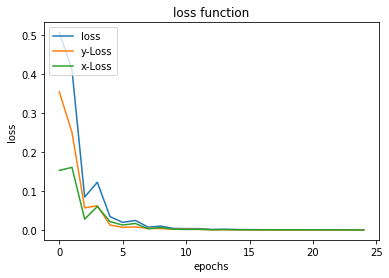

In [44]:
hist = model.fit(distances,datapoints,epochs =25)
plt.title('loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['yOut_loss'])
plt.plot(hist.history['xOut_loss'])
plt.legend(['loss', 'y-Loss', 'x-Loss'], loc='upper left')

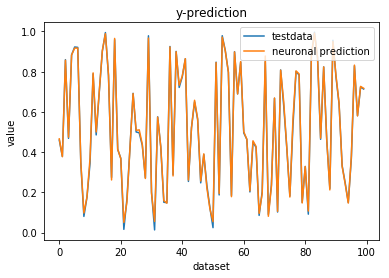

In [45]:
result = model.predict(distances)

plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction')
plt.plot(datapoints[1])   
plt.plot(result[1])
plt.legend(['testdata', 'neuronal prediction'])

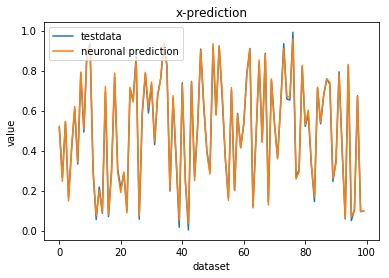

In [46]:
plt.title('x-prediction')
plt.ylabel('value')
plt.xlabel('dataset')
plt.plot(datapoints[0])   
plt.plot(result[0])
plt.legend(['testdata', 'neuronal prediction'])

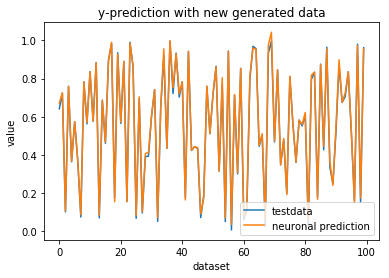

In [47]:
test_distance, test_datapoint, test_sensor = tdg.generateStatic4PointIO(100,2,COORDINATE_SYSTEM)   

testResult = model.predict(test_distance)

plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction with new generated data')
plt.plot(test_datapoint[1])   
plt.plot(testResult[1])
plt.legend(['testdata', 'neuronal prediction'])

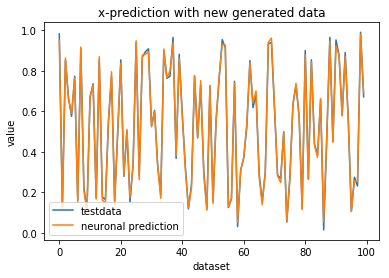

In [48]:
plt.title('x-prediction with new generated data')
plt.ylabel('value')
plt.xlabel('dataset')
plt.plot(test_datapoint[0])   
plt.plot(testResult[0])
plt.legend(['testdata', 'neuronal prediction'])

In [49]:
evaluation = model.evaluate(distances,test_datapoint)
 
print(evaluation[0])

100/100 [==============================] - 0s 2ms/step
0.365795476436615


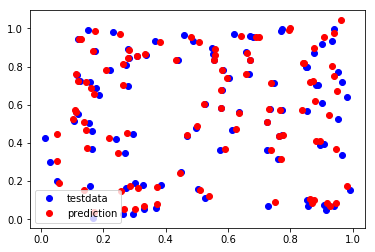

In [50]:
plt.plot(test_datapoint[0], test_datapoint[1], 'bo')
plt.plot(testResult[0], testResult[1], 'ro')
plt.legend(['testdata', 'prediction'])

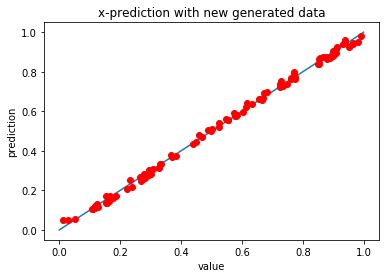

In [51]:
plt.title('x-prediction with new generated data')
plt.ylabel('prediction')
plt.xlabel('value')
plt.plot([0,1])
plt.plot(test_datapoint[0], testResult[0], 'ro')

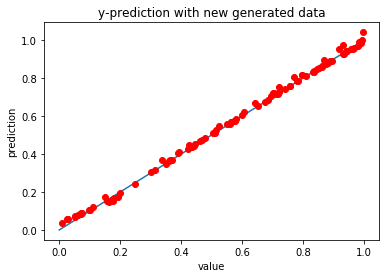

In [52]:
plt.title('y-prediction with new generated data')
plt.ylabel('prediction')
plt.xlabel('value')
plt.plot([0,1])
plt.plot(test_datapoint[1], testResult[1], 'ro')